In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

# %matplotlib notebook

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Variables:

Gender: (female,male)

Age (years): numeric

Height (meters): numeric

Weight (kg): numeric

family_history_with_overweight: (no,yes)

FAVC (Frequent consumption of high caloric food): (no,yes)

FCVC (Frequency of consumption of vegetables): (Never,Sometimes,Always)

NCP (Number of main meals): (Between 1 & 2,Three,More than three)

CAEC (Consumption of food between meals): (no,Sometimes,Frequently,Always)

SMOKE: (no,yes)

CH2O (Consumption of water daily): (Less than a liter,Between 1 and 2 L,More than 2 L)

SCC (Calories consumption monitoring): (no,yes)

FAF (Physical activity frequency): (I do not have,1 or 2 days,2 or 4 days,4 or 5 days)

TUE (Time using technology devices): (0–2 hours,3–5 hours,More than 5 hours)

CALC (Consumption of alcohol): (no,Sometimes,Frequently,Always)

MTRANS (Transportation used): (Automobile,Motorbike,Bike,Public Transportation,Walking)

NObeyesdad: (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II 
and Obesity Type III) --> (Insufficient,Normal,Overweight,Obese)

In [49]:
#Loading the data
obesity_data = pd.read_csv('../data/original_data.csv')
obesity_df = pd.DataFrame(obesity_data)
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [50]:
#Rounding the data
obesity_rounded = obesity_df.round({'Age':0,'Height':1,'Weight':1, 'FCVC':0, 'NCP':0, 'CH2O':0, 'FAF':0, 'TUE':0})
obesity_rounded.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,21.0,1.7,131.4,yes,yes,3.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22.0,1.7,133.7,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23.0,1.8,133.7,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.0,1.7,133.3,yes,yes,3.0,3.0,Sometimes,no,3.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24.0,1.7,133.5,yes,yes,3.0,3.0,Sometimes,no,3.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III


In [51]:
#Remove types from weight type
obesity_rounded['NObeyesdad'] = obesity_rounded['NObeyesdad'].str.split('_').str[0]
obesity_rounded['NObeyesdad'] = obesity_rounded['NObeyesdad'].str.split(' ').str[0]
obesity_rounded['NObeyesdad'].replace(to_replace='Obesity',value='Obese',inplace=True)
obesity_rounded.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.6,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal
1,Female,21.0,1.5,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal
2,Male,23.0,1.8,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal
3,Male,27.0,1.8,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight
4,Male,22.0,1.8,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight


In [52]:
#Make categorical data consistent and easy to understand prior to encoding
obesity_rounded['FCVC'].replace({1.0:'Never', 2.0:'Sometimes',3.0:'Always'},inplace=True)
obesity_rounded['NCP'].replace({1.0:'Between 1 & 2', 2.0:'Three',3.0:'More than three'},inplace=True)
obesity_rounded['CH2O'].replace({1.0:'Less than a liter', 2.0:'Between 1 and 2 L',3.0:'More than 2 L'},inplace=True)
obesity_rounded['FAF'].replace({0.0:'I do not have', 1.0:'1 or 2 days', 2.0:'2 or 4 days',3.0:'4 or 5 days'},inplace=True)
obesity_rounded['TUE'].replace({0.0:'0 to 2 hours', 1.0:'3 to 5 hours',2.0:'More than 5 hours'},inplace=True)
obesity_rounded.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.6,64.0,yes,no,Sometimes,More than three,Sometimes,no,Between 1 and 2 L,no,I do not have,3 to 5 hours,no,Public_Transportation,Normal
1,Female,21.0,1.5,56.0,yes,no,Always,More than three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0 to 2 hours,Sometimes,Public_Transportation,Normal
2,Male,23.0,1.8,77.0,yes,no,Sometimes,More than three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3 to 5 hours,Frequently,Public_Transportation,Normal
3,Male,27.0,1.8,87.0,no,no,Always,More than three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0 to 2 hours,Frequently,Walking,Overweight
4,Male,22.0,1.8,89.8,no,no,Sometimes,Between 1 & 2,Sometimes,no,Between 1 and 2 L,no,I do not have,0 to 2 hours,Sometimes,Public_Transportation,Overweight


In [53]:
# one hot encode the variables where order/weight is not important
# 'Gender','family_history_with_overweight','FAVC','SMOKE','SCC','MTRANS'
obese_one_hot = pd.get_dummies(data=obesity_rounded, columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC','MTRANS'])   
obesity_numeric = obese_one_hot
obesity_numeric.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.6,64.0,Sometimes,More than three,Sometimes,Between 1 and 2 L,I do not have,3 to 5 hours,no,...,0,1,0,1,0,0,0,0,1,0
1,21.0,1.5,56.0,Always,More than three,Sometimes,More than 2 L,4 or 5 days,0 to 2 hours,Sometimes,...,0,0,1,0,1,0,0,0,1,0
2,23.0,1.8,77.0,Sometimes,More than three,Sometimes,Between 1 and 2 L,2 or 4 days,3 to 5 hours,Frequently,...,0,1,0,1,0,0,0,0,1,0
3,27.0,1.8,87.0,Always,More than three,Sometimes,Between 1 and 2 L,2 or 4 days,0 to 2 hours,Frequently,...,0,1,0,1,0,0,0,0,0,1
4,22.0,1.8,89.8,Sometimes,Between 1 & 2,Sometimes,Between 1 and 2 L,I do not have,0 to 2 hours,Sometimes,...,0,1,0,1,0,0,0,0,1,0


In [54]:
# this is manually doing label encoding
# obesity_numeric['Gender'].replace({'Female':0,'Male':1},inplace=True)
# obesity_numeric['family_history_with_overweight'].replace({'no':0,'yes':1},inplace=True)
# obesity_numeric['FAVC'].replace({'no':0,'yes':1},inplace=True)
obesity_numeric['FCVC'].replace({'Never':0,'Sometimes':1,'Always':2},inplace=True)
obesity_numeric['NCP'].replace({'Between 1 & 2':0,'Three':1,'More than three':2},inplace=True)
obesity_numeric['CAEC'].replace({'no':0,'Sometimes':1,'Frequently':2,'Always':3},inplace=True)
# obesity_numeric['SMOKE'].replace({'no':0,'yes':1},inplace=True)
obesity_numeric['CH2O'].replace({'Less than a liter':0, 'Between 1 and 2 L':1,'More than 2 L':2},inplace=True)
# obesity_numeric['SCC'].replace({'no':0,'yes':1},inplace=True)
obesity_numeric['FAF'].replace({'I do not have':0, '1 or 2 days':1, '2 or 4 days':2,'4 or 5 days':3},inplace=True)
obesity_numeric['TUE'].replace({'0 to 2 hours':0, '3 to 5 hours':1,'More than 5 hours':2},inplace=True)
obesity_numeric['CALC'].replace({'no':0,'Sometimes':1,'Frequently':2,'Always':3},inplace=True)
# obesity_numeric['MTRANS'].replace({'Automobile':0,'Motorbike':1,'Bike':2,'Public_Transportation':3,'Walking':4},inplace=True)
obesity_numeric['NObeyesdad'].replace({'Insufficient':0,'Normal':1,'Overweight':2,'Obese':3},inplace=True)

In [55]:
#Copying data and make dataframe
obesity_encoded = obesity_numeric.copy()
obesity_encoded = pd.DataFrame(obesity_numeric, columns=['Age','Height','Weight','FCVC','NCP','CAEC','CH2O','FAF','TUE',
                                                        'CALC','Gender_Female','Gender_Male','family_history_with_overweight_no',
                                                        'family_history_with_overweight_yes','FAVC_no','FAVC_yes','SMOKE_no',
                                                        'SMOKE_yes','SCC_no','SCC_yes','MTRANS_Automobile','MTRANS_Bike',
                                                        'MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking',
                                                        'NObeyesdad'])

In [56]:
#Info of data
# obesity_encoded.info();

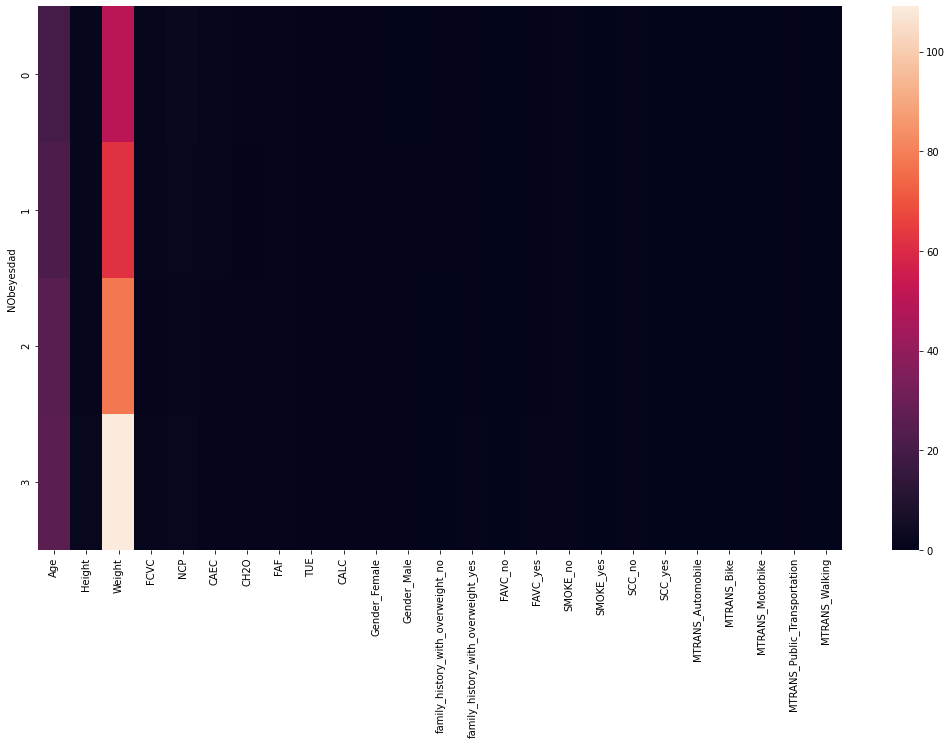

In [57]:
#Shows we need to scale the data

level_means = obesity_encoded.groupby('NObeyesdad').mean()
level_means.head()

plt.figure(figsize=(18, 10))
sns.heatmap(level_means)

In [58]:
#Averge feature values, shows there needs to be scaling
round(obesity_encoded.drop('NObeyesdad', axis = 1).mean(), 2)

Age                                   24.32
Height                                 1.70
Weight                                86.59
FCVC                                   1.42
NCP                                    1.76
CAEC                                   1.14
CH2O                                   1.01
FAF                                    1.01
TUE                                    0.66
CALC                                   0.73
Gender_Female                          0.49
Gender_Male                            0.51
family_history_with_overweight_no      0.18
family_history_with_overweight_yes     0.82
FAVC_no                                0.12
FAVC_yes                               0.88
SMOKE_no                               0.98
SMOKE_yes                              0.02
SCC_no                                 0.95
SCC_yes                                0.05
MTRANS_Automobile                      0.22
MTRANS_Bike                            0.00
MTRANS_Motorbike                

## BEGIN SVM ML (Linear & RBF)

In [59]:
#Assign X (data) and y (target)
data = obesity_encoded.drop('NObeyesdad', axis = 1)

target_names = ['0', '1', '2', '3']
target = obesity_numeric['NObeyesdad']
print(data.shape, target.shape)

(2111, 25) (2111,)


In [60]:
#Scaling the features
#Scale function standardises each column
from sklearn.preprocessing import scale   
data = scale(data)

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 42)

In [61]:
#Confirm that splitting also has similar distribution of each obesity level
print(y_train.mean())
print(y_test.mean())

2.0675931775110548
2.0643939393939394


In [62]:
#Linear model & fit
model_linear = SVC(kernel = 'linear')
model_linear.fit(X_train, y_train)

#Predict
linear_y_pred = model_linear.predict(X_test)

In [63]:
#Evaluate the model using confustion matrix
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=linear_y_pred)

array([[ 67,   1,   0,   0],
       [ 12,  59,   7,   0],
       [  0,   4, 125,   5],
       [  0,   0,   1, 247]], dtype=int64)

In [64]:
#Print other metrics
print('Accuracy :', metrics.accuracy_score(y_test, linear_y_pred))
print('Precision Score :',metrics.precision_score(y_test, linear_y_pred, average='weighted'))
print('Recall Score :',metrics.recall_score(y_test, linear_y_pred, average='weighted'))

Accuracy : 0.9431818181818182
Precision Score : 0.9443112704154821
Recall Score : 0.9431818181818182


In [65]:
# Calculate Linear classification report
from sklearn.metrics import classification_report
predictions_linear = model_linear.predict(X_test)
print(classification_report(y_test, predictions_linear,
                            target_names=target_names))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91        68
           1       0.92      0.76      0.83        78
           2       0.94      0.93      0.94       134
           3       0.98      1.00      0.99       248

    accuracy                           0.94       528
   macro avg       0.92      0.92      0.92       528
weighted avg       0.94      0.94      0.94       528



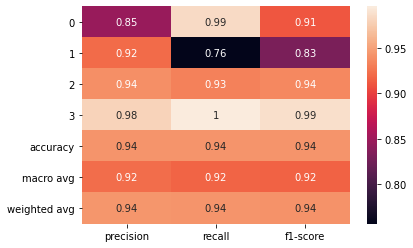

In [66]:
#Setting up linear classification report (display & save png)
clf_linear_report = classification_report(y_test, predictions_linear,
                            target_names=target_names, output_dict = True)

linear_summary = sns.heatmap(pd.DataFrame(clf_linear_report).iloc[:-1, :].T, annot=True)
plt.savefig('../obesity_project/static/content/img/svm_linear/svm_linear_summary_png', bbox_inches="tight")

In [67]:
#Non linear model & fit
non_linear_model = SVC(kernel='rbf')
non_linear_model.fit(X_train, y_train)

#Predict
non_linear_y_pred = non_linear_model.predict(X_test)

In [68]:
#Evaluate the model using confustion matrix
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=non_linear_y_pred)

array([[ 61,   6,   1,   0],
       [  8,  50,  20,   0],
       [  1,  16, 113,   4],
       [  0,   3,   6, 239]], dtype=int64)

In [69]:
#Print other metrics
print('Accuracy :', metrics.accuracy_score(y_test, non_linear_y_pred))
print('Precision Score :',metrics.precision_score(y_test, non_linear_y_pred, average='weighted'))
print('Recall Score :',metrics.recall_score(y_test, non_linear_y_pred, average='weighted'))

Accuracy : 0.8768939393939394
Precision Score : 0.877522691643062
Recall Score : 0.8768939393939394


In [70]:
# Calculate Non Linear classification report
from sklearn.metrics import classification_report
predictions_rbf = non_linear_model.predict(X_test)
print(classification_report(y_test, predictions_rbf,
                            target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        68
           1       0.67      0.64      0.65        78
           2       0.81      0.84      0.82       134
           3       0.98      0.96      0.97       248

    accuracy                           0.88       528
   macro avg       0.83      0.84      0.83       528
weighted avg       0.88      0.88      0.88       528



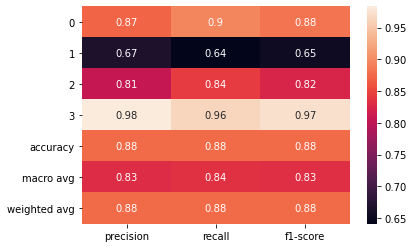

In [71]:
#Setting up non linear classification report (display & save png) 
clf_rbf_report = classification_report(y_test, predictions_rbf,
                            target_names=target_names, output_dict = True)

non_linear_summary = sns.heatmap(pd.DataFrame(clf_rbf_report).iloc[:-1, :].T, annot=True)
plt.savefig('../obesity_project/static/content/img/svm_rbf/svm_rbf_summary_png', bbox_inches="tight")

## Hyperparameter Tuning

Now, optimise hyperparameters of C & Gamma

## Grid Search to find Optimal Hyperparameter

In [72]:
#Does not touch the testing dataset, getting accuracy for each fold and averging the results
#Creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

#Specify range of hyperparameters
#Set the parameters by corss-validation
hyper_params = [{
    'gamma' : [1e-2, 1e-3, 1e-4],
    'C' : [1,10,100,1000]
}]

#specify model
model = SVC(kernel = 'rbf')

#Set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,
                       param_grid = hyper_params,
                       scoring = 'accuracy',
                       cv = folds,
                       verbose = 1,
                       return_train_score = True)

#Fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [73]:
#Results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.046055,0.005165,0.009568,0.001359,1,0.01,"{'C': 1, 'gamma': 0.01}",0.845426,0.870662,0.892744,...,0.855311,0.026462,7,0.886256,0.887046,0.891785,0.891871,0.890292,0.889450,0.002367
1,0.062636,0.002043,0.011166,0.000750,1,0.001,"{'C': 1, 'gamma': 0.001}",0.668770,0.621451,0.602524,...,0.618422,0.035065,11,0.645340,0.644550,0.628752,0.646409,0.646409,0.642292,0.006806
2,0.071578,0.001572,0.011773,0.000733,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.507886,0.457413,0.454259,...,0.457329,0.042010,12,0.444708,0.457346,0.458136,0.475927,0.450671,0.457358,0.010490
3,0.031912,0.000005,0.006183,0.000398,10,0.01,"{'C': 10, 'gamma': 0.01}",0.914826,0.936909,0.927445,...,0.922925,0.008194,5,0.975513,0.972354,0.977093,0.979479,0.978690,0.976626,0.002534
4,0.043087,0.000398,0.008583,0.000481,10,0.001,"{'C': 10, 'gamma': 0.001}",0.845426,0.880126,0.883281,...,0.854045,0.025712,8,0.879147,0.875987,0.875197,0.882399,0.876875,0.877921,0.002600
5,0.063038,0.003907,0.011365,0.000492,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.665615,0.621451,0.599369,...,0.618426,0.033862,10,0.644550,0.646919,0.626382,0.644830,0.647198,0.641976,0.007869
6,0.031928,0.000862,0.003983,0.000005,100,0.01,"{'C': 100, 'gamma': 0.01}",0.936909,0.943218,0.940063,...,0.931759,0.011508,2,0.997630,0.997630,0.996051,0.998421,0.996054,0.997157,0.000947
7,0.037301,0.001848,0.006388,0.000778,100,0.001,"{'C': 100, 'gamma': 0.001}",0.927445,0.940063,0.949527,...,0.930496,0.012723,4,0.954976,0.959716,0.957346,0.961326,0.956590,0.957991,0.002261
8,0.044671,0.003243,0.008976,0.000620,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.835962,0.870662,0.870662,...,0.843938,0.025969,9,0.866509,0.871248,0.863349,0.879242,0.874507,0.870971,0.005639
9,0.032136,0.001372,0.003479,0.000455,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.940063,0.940063,0.940063,...,0.931759,0.011334,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


To get a better sense of how training and test accuracy varies with C, plot the tranining and test accuracies againt C.

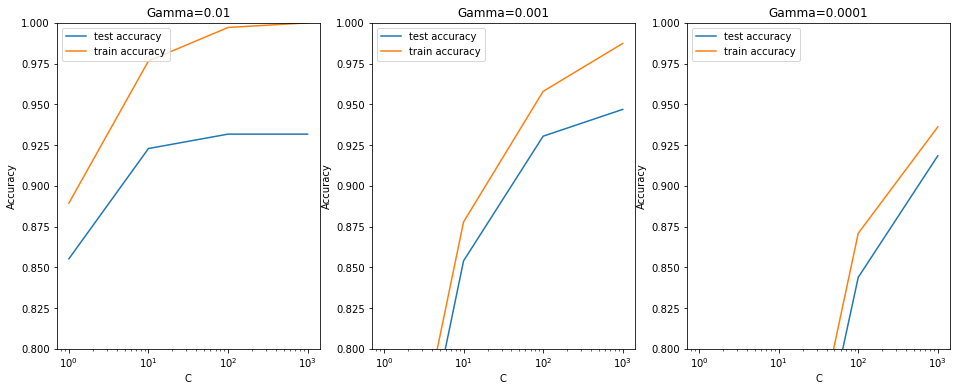

In [74]:
#Converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

#Plotting
plt.figure(figsize=(16,6))

#Subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]


plt.plot(gamma_01['param_C'], gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'], gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.01')
plt.ylim([0.80,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

#Subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]


plt.plot(gamma_001['param_C'], gamma_001['mean_test_score'])
plt.plot(gamma_001['param_C'], gamma_001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.001')
plt.ylim([0.80,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

#Subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]


plt.plot(gamma_0001['param_C'], gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'], gamma_0001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.0001')
plt.ylim([0.80,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

plt.savefig('../obesity_project/static/content/img/svm_rbf/svm_rbf_gamma_C_optimization_png', bbox_inches="tight")

In [75]:
#Specify optimal hyperparameters
best_params = {'C':1000, 'gamma': 0.001, 'kernel':'rbf'}

#Model
final_model = SVC(C=1000, gamma=0.001, kernel='rbf')

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)



#Print other metrics
print(metrics.confusion_matrix(y_test, y_pred), '\n')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))
print('Precision Score :',metrics.precision_score(y_test, y_pred, average='weighted'))
print('Recall Score :',metrics.recall_score(y_test, y_pred, average='weighted'))

[[ 66   2   0   0]
 [  2  69   7   0]
 [  0   6 124   4]
 [  0   0   2 246]] 

Accuracy : 0.9564393939393939
Precision Score : 0.9561750657635825
Recall Score : 0.9564393939393939


In [1]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions_final = final_model.predict(X_test)
print(classification_report(y_test, predictions_final,
                            target_names=target_names))

NameError: name 'final_model' is not defined

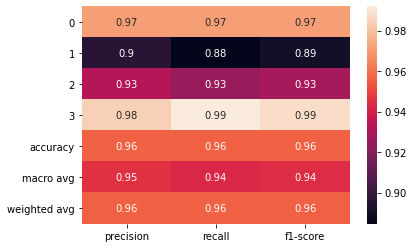

In [77]:
#Setting up non linear classification report (display & save png) 
clf_optimized_rbf_report = classification_report(y_test, predictions_final,
                            target_names=target_names, output_dict = True)

non_linear_summary = sns.heatmap(pd.DataFrame(clf_optimized_rbf_report).iloc[:-1, :].T, annot=True)
plt.savefig('../obesity_project/static/content/img/svm_rbf/svm_optimized_rbf_summary_png', bbox_inches="tight")

In [78]:
#Saving the model
from joblib import dump, load
dump(final_model, 'svm_rbf_trained.joblib') 

['svm_rbf_trained.joblib']

In [79]:
#Test loading the model
from joblib import dump, load
final_model_upload = load('svm_rbf_trained.joblib')

In [80]:
# Calculate classification report for loaded model
from sklearn.metrics import classification_report
predictions_final = final_model_upload.predict(X_test)
print(classification_report(y_test, predictions_final,
                            target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        68
           1       0.90      0.88      0.89        78
           2       0.93      0.93      0.93       134
           3       0.98      0.99      0.99       248

    accuracy                           0.96       528
   macro avg       0.95      0.94      0.94       528
weighted avg       0.96      0.96      0.96       528

